## 1. Import Necessary Libraries

In [135]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from statsmodels.graphics.tsaplots import plot_acf

## 2. Import Data 

In [3]:
daily_temp=pd.read_csv('daily-minimum-temperatures.csv')
daily_temp

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


## 3. Data Understanding

### 3.1 Initial Analysis

In [4]:
daily_temp.shape

(3650, 2)

In [5]:
daily_temp.isna().sum()

Date    0
Temp    0
dtype: int64

In [6]:
daily_temp.dtypes

Date     object
Temp    float64
dtype: object

### 3.2 Data Visualization/ EDA

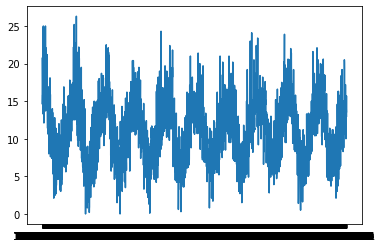

In [9]:
plt.plot(daily_temp['Date'], daily_temp['Temp'])
plt.show()

### To display this chart in a better way so that we  can get the dates in X_axis, do the following

In [12]:
temp_data=pd.read_csv('daily-minimum-temperatures.csv', index_col=0, parse_dates=True)
temp_data

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


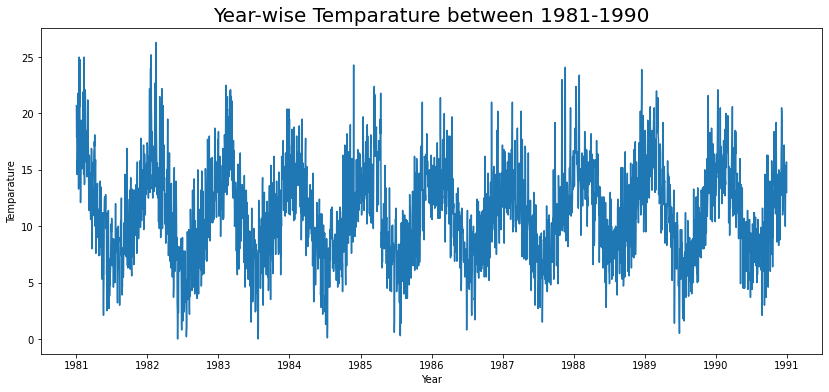

In [18]:
plt.figure(figsize=(14,6))
plt.plot(temp_data['Temp'])
plt.xlabel('Year')
plt.ylabel('Temparature')
plt.title('Year-wise Temparature between 1981-1990', size=20)
plt.show()

Additive seasonality with constant trend

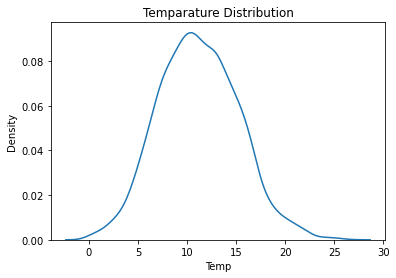

In [22]:
sns.distplot(a=temp_data['Temp'], hist=False)
plt.title('Temparature Distribution')
plt.show()

### Year-wise and Month-wise Temparature Fluctuations/ Distributions

In [24]:
temp_data.head(10)

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
1981-01-06,15.8
1981-01-07,15.8
1981-01-08,17.4
1981-01-09,21.8


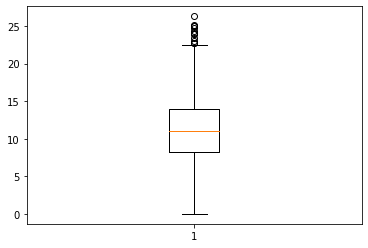

In [23]:
plt.boxplot(x='Temp', data=temp_data)
plt.show()

In [27]:
#squeeze: If the parsed data only contains one column then return a Series.
temp_data_squeezed=pd.read_csv('daily-minimum-temperatures.csv', index_col=0, parse_dates=True, squeeze=True)
temp_data_squeezed

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
              ... 
1990-12-27    14.0
1990-12-28    13.6
1990-12-29    13.5
1990-12-30    15.7
1990-12-31    13.0
Name: Temp, Length: 3650, dtype: float64

In [127]:
groups=temp_data_squeezed.groupby(pd.Grouper(freq='A'))
years=pd.DataFrame()

for name, group in groups:
    #print(name.year)
    #print(group.values)
    years[name.year]=group.values

years

,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990
0,20.7,17.0,18.4,19.5,13.3,12.9,12.3,15.3,14.3,14.8
1,17.9,15.0,15.0,17.1,15.2,13.8,13.8,14.3,17.4,13.3
2,18.8,13.5,10.9,17.1,13.1,10.6,15.3,13.5,18.5,15.6
3,14.6,15.2,11.4,12.0,12.7,12.6,15.6,15.0,16.8,14.5
4,15.8,13.0,14.8,11.0,14.6,13.7,16.2,13.6,11.5,14.3
...,...,...,...,...,...,...,...,...,...,...
360,15.5,15.3,13.9,12.2,11.5,14.6,16.2,9.5,13.3,14.0
361,13.3,16.3,11.1,12.0,10.8,14.2,14.2,12.9,11.7,13.6
362,15.6,15.8,16.1,12.6,12.0,13.2,14.3,12.9,10.4,13.5
363,15.2,17.7,20.4,16.0,16.3,11.7,13.3,14.8,14.4,15.7


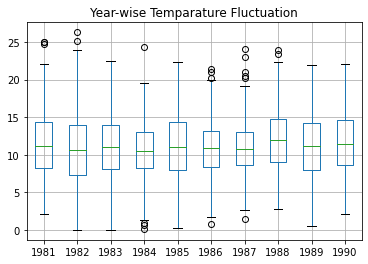

In [58]:
years.boxplot()
plt.title('Year-wise Temparature Fluctuation')
plt.show()

In [133]:

#month_data=temp_data_squeezed.groupby(pd.Grouper(freq='m'))
#years=pd.DataFrame()

#for name, group in month_data:
    #print(name.year)
    #print(group.values.sum())
    #years[name.year]=group.values.mean()
    

#years

### Lag Plot

In order to know whether the temparature are impacting by its previous day

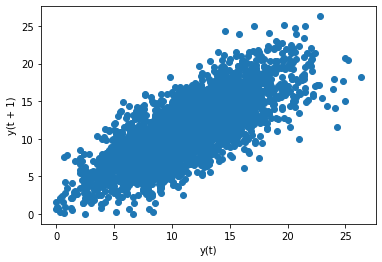

In [134]:
pd.plotting.lag_plot(temp_data)
plt.show()

It is positively correlated and can be modelled

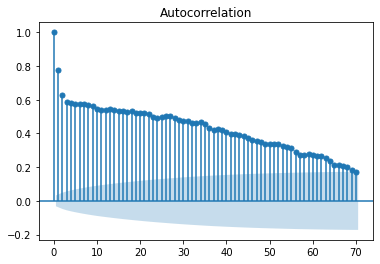

In [138]:
plot_acf(temp_data, lags=70) 
plt.show()

Our first day temparature is contributing till 70th day temparature